# 📊 **Regresi Linear Sederhana**
## *Menggunakan Python*

---

## 🎯 Contoh Kasus: 
**Prediksi Gaji berdasarkan Tahun Bekerja**

Dataset:  
🔗 [Unduh di Google Drive](https://drive.google.com/file/d/1aSX6KOE2ziTOiapQgbWuGiqzGK3Ow594/view)

---

## 🧭 Tahapan Berdasarkan CRISP-DM

CRISP-DM adalah metodologi standar dalam proses data mining, terdiri dari 6 fase utama:

1. **Business Understanding**
2. **Data Understanding**
3. **Data Preparation**
4. **Modeling**
5. **Evaluation**
6. **Deployment**


## 🧠 1. Business Understanding

**Tujuan:**  
Memahami permasalahan bisnis dan tujuan analisis.

**Kasus:**  
Perusahaan ingin mengetahui **hubungan antara tahun pengalaman kerja dengan gaji**, dan menggunakan model regresi linear untuk **memprediksi gaji** berdasarkan tahun pengalaman kerja seseorang.


## 🔍 2. Data Understanding

Langkah-langkah:

### 📥 Import Library
### 📂 Load Dataset
### ℹ️ Check the General Information

# Import Library

In [2]:
# Impor library yang dibutuhkan
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load Dataset

In [3]:
# Impor dataset dari Google Drive
dataset = pd.read_csv("Daftar_gaji.csv")
print(dataset.head())

   Tahun_bekerja   Gaji
0            1.1  39343
1            1.3  46205
2            1.5  37731
3            2.0  43525
4            2.2  39891


# Check the General Information

Melihat informasi Umum Ini digunakan untuk mengenali data kita.

In [4]:
#untuk melihat ukuran data
dataset.shape

(30, 2)

In [5]:
#Melihat informasi data kita mulai dari jumlah data, tipe data, memory yang digunakan dll.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Tahun_bekerja  30 non-null     float64
 1   Gaji           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 612.0 bytes


In [6]:
#Melihat statistical description dari data mulai dari mean, kuartil, standard deviation dll.
dataset.describe()

,Tahun_bekerja,Gaji
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


## 🧹 3. Data Preparation

### ❓ Handling Missing Values


In [7]:
#Mencari dan menangani missing values.
dataset.isnull().sum()

Tahun_bekerja    0
Gaji             0
dtype: int64

## 📊 Exploratory Data Analysis (EDA)

### 📈 Visualisasi Hubungan

### 📉 Korelasi

```python
print(data.corr())
```

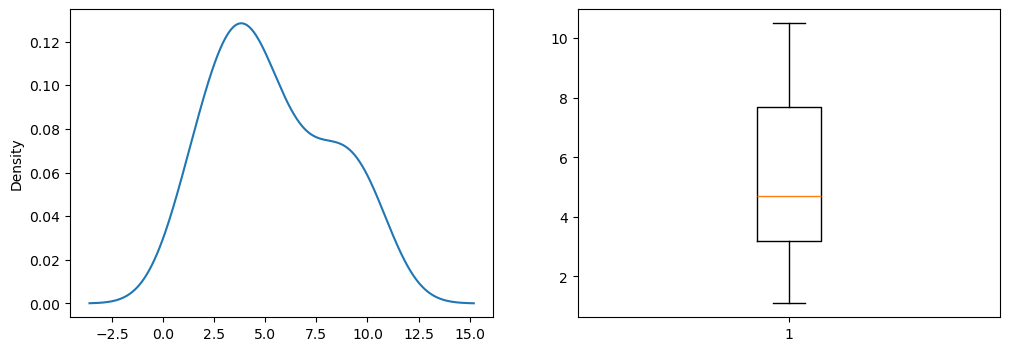

In [10]:
#Melakukan Exploratory Data Analysis (EDA) 
#Univariate analysis Tahun_bekerja.
#Melihat distribusi dari Tahun_bekerja.
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
dataset['Tahun_bekerja'].plot(kind='kde')
f.add_subplot(1,2,2)
plt.boxplot(dataset['Tahun_bekerja'])
plt.show()

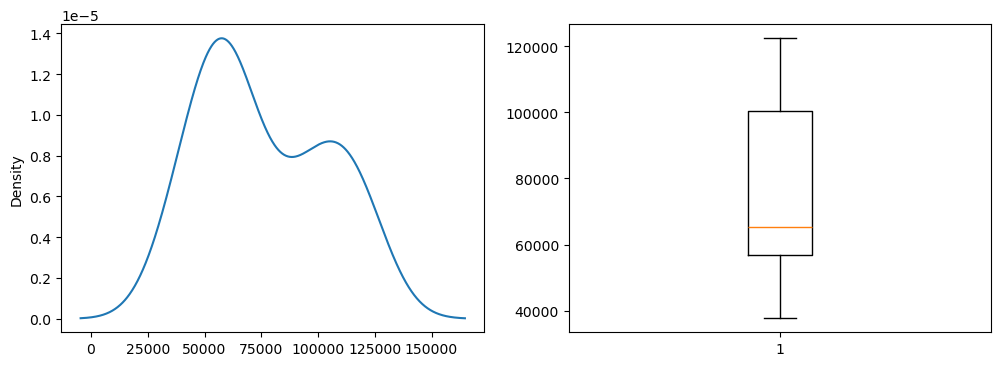

In [11]:
#Melakukan Exploratory Data Analysis (EDA) untuk lebih mengenal data kita dan menemukan insights dari data.
#Univariate analysis Gaji.
#Melihat distribusi dari Gaji.
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
dataset['Gaji'].plot(kind='kde')
f.add_subplot(1,2,2)
plt.boxplot(dataset['Gaji'])
plt.show()

In [ ]:
dataset.Gaji.median()

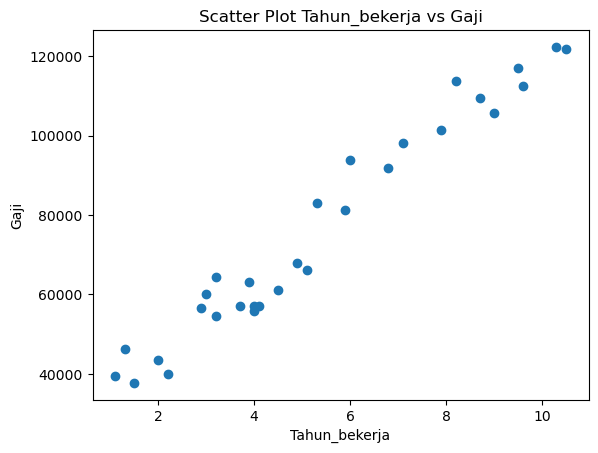

In [12]:
#Bivariate analysis Tahun_bekerja dan Gaji.
#Menggunakan scatter plot.
plt.scatter(dataset['Tahun_bekerja'], dataset['Gaji'])
plt.xlabel('Tahun_bekerja')
plt.ylabel('Gaji')
plt.title('Scatter Plot Tahun_bekerja vs Gaji')
plt.show()

In [15]:
#Mengetahui nilai korelasi dari Tahun_bekerja dan Gaji.
dataset.corr()

,Tahun_bekerja,Gaji
Tahun_bekerja,1.000000,0.978242
Gaji,0.978242,1.000000


<Axes: >

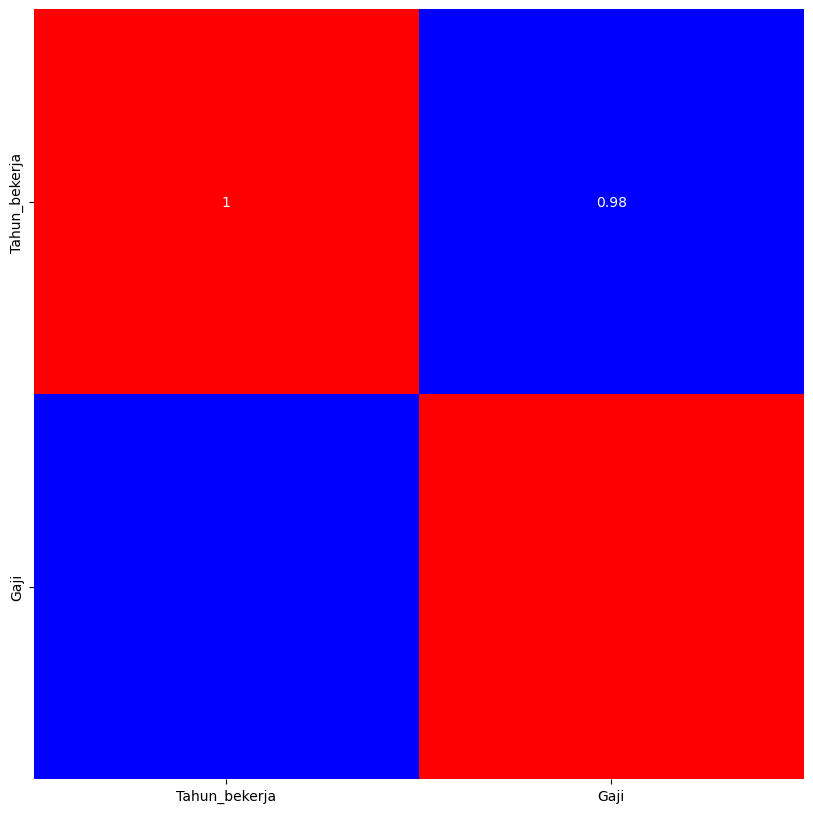

In [13]:
#corelasi penuh warna merah dan putih tidak
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(dataset.corr(), cmap='bwr', cbar=False, annot=True, square=True)

## 🧪 4. Modeling

### 🔀 Splitting Data


In [16]:
#ambil konten data saja, buang header nya
#X sebagai variabel indepedent/variable bebas/variabel independent/ predictor, yakni Tahun bekerja
X = dataset.iloc[:, 0:1].values
print(X)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [17]:
#ambil konten data saja, buang header nya
#Y sebagai variabel dependent/variable terikat/variabel tak bebas/ response, yakni Gaji
Y = dataset.iloc[:, 1].values
print(Y)

[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


In [18]:
# Membagi data menjadi Training Set dan Test Set
# import sckit learn  untuk Machine Learning
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)
# random_state = 0 adalah cara untuk memastikan bahwa proses acak dalam program (seperti membagi data menjadi dua bagian) selalu memberikan hasil yang sama setiap kali kita menjalankan program yang sama. Ini seperti memberikan "nomor identifikasi" pada proses acak, sehingga hasilnya konsisten dan tidak berubah meskipun dijalankan berkali-kali.
print(X_train.shape)
print(X_train)

(21, 1)
[[ 7.9]
 [ 2.9]
 [ 5.1]
 [ 3.2]
 [ 4.5]
 [ 8.2]
 [ 6.8]
 [ 1.3]
 [10.5]
 [ 3. ]
 [ 2.2]
 [ 5.9]
 [ 6. ]
 [ 3.7]
 [ 3.2]
 [ 9. ]
 [ 2. ]
 [ 1.1]
 [ 7.1]
 [ 4.9]
 [ 4. ]]


In [19]:
# panggil modul LinearRegression untuk menjalankan regresi liear
from sklearn.linear_model import LinearRegression
# membuat objek regresi linear
lin_reg = LinearRegression()
# membangun model (training model dari data set yang sudah kita split)
lin_reg.fit(X_train, Y_train)

LinearRegression()

In [20]:
# cari tau nilai slope/koefisien (θi ) dan intercept (θ0).
# ŷ=θ0+θiΧi+Ɛi

# coef_ memberikan pengaruh setiap fitur terhadap prediksi.
# intercept_ memberikan nilai dasar prediksi ketika semua fitur bernilai nol.

print(lin_reg.coef_)
print(lin_reg.intercept_)

[9360.26128619]
26777.391341197632


### 1. lin_reg.coef_ : 9360.26
Koefisien (slope) dari model adalah 9360.26

Ini berarti bahwa untuk setiap tambahan satu unit pada variabel input (misalnya, satu tahun bekerja), nilai prediksi gaji akan meningkat sebesar 9360.26.

Jadi, setiap tambahan satu tahun bekerja akan menyebabkan gaji meningkat sekitar 9360.26.

### 2. lin_reg.intercept_ : 26777.39
Intercept (konstanta) dari model adalah 26777.39

Ini adalah nilai prediksi untuk gaji ketika tahun bekerja sama dengan 0 (misalnya, jika seseorang baru mulai bekerja, atau tidak memiliki tahun bekerja).

Artinya, gaji dasar (intercept) untuk seseorang yang baru mulai bekerja adalah sekitar 26,777.39.

Interpretasi secara keseluruhan:
Jika kita ingin memprediksi gaji berdasarkan tahun bekerja menggunakan persamaan regresi linear:

```python
Gaji = (9360.26 * Tahun Bekerja) + 26777.39
```

## 🧾 5. Evaluation

### 📐 Evaluasi Model

### 📉 Visualisasi Hasil Prediksi

In [21]:
# memprediksi model dengan test set(melakukan proses testing)
Y_prediksi = lin_reg.predict(X_test)

In [22]:
#Lakukan evaluasi performa
#tampilkan hasil dari data aktual dan data prediksi
df = pd.DataFrame({'aktual': Y_test, 'Prediksi': Y_prediksi})
print(df)

   aktual       Prediksi
0   37731   40817.783270
1  122391  123188.082589
2   57081   65154.462615
3   63218   63282.410357
4  116969  115699.873560
5  109431  108211.664531
6  112635  116635.899689
7   55794   64218.436486
8   83088   76386.776158


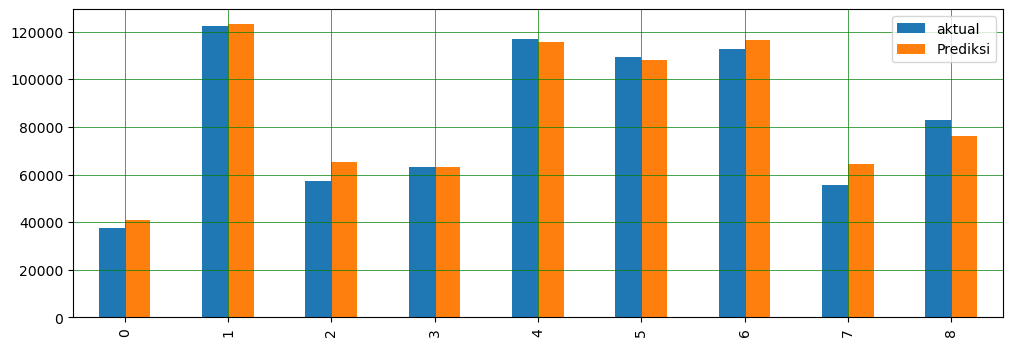

In [23]:
#visualisasi galat/ selisih data aktual dengan data prediksi
df.plot(kind='bar',figsize=(12,4))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

mae = metrics.mean_absolute_error(Y_test, Y_prediksi)
mse = metrics.mean_squared_error(Y_test, Y_prediksi)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(Y_test, Y_prediksi)

print("=== Hasil Evaluasi Model Regresi ===")
print(f"Mean Absolute Error (MAE)     : {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²)               : {r2:.4f}")

| Metrik Evaluasi                    | Nilai           | Penjelasan                                                                                                                                                    |
| ---------------------------------- | --------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **MAE (Mean Absolute Error)**      | `3737.42`       | Rata-rata kesalahan prediksi adalah sekitar **3737 satuan** dari nilai sebenarnya. Ini menunjukkan seberapa besar kesalahan secara umum.                      |
| **RMSE (Root Mean Squared Error)** | `4834.26`       | Rata-rata kesalahan prediksi dalam satuan asli. Artinya, model memiliki kesalahan rata-rata sekitar **4834 unit**.                                            |
| **R² (R-squared)**                 | `0.9741`        | Model menjelaskan sekitar **97.41%** dari variasi dalam data target. Ini adalah nilai yang **sangat baik**, menunjukkan bahwa model sangat cocok dengan data. |


Text(0.5, 1.0, 'Prediksi Gaji Berdasarkan tahun bekerja (training set)')

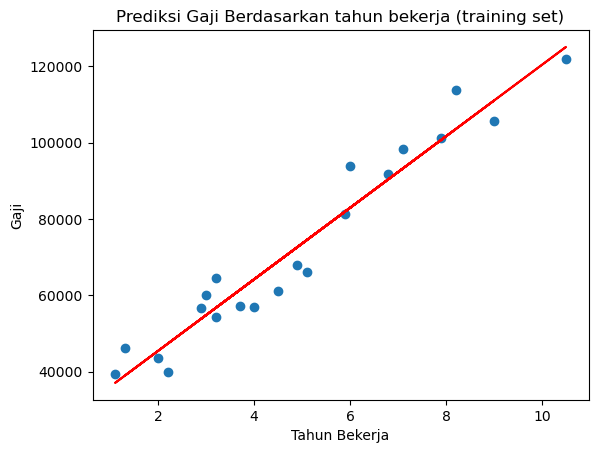

In [24]:
#visualisasi data training

plt.scatter(X_train, Y_train)
plt.plot(X_train, lin_reg.predict(X_train), c='red')
plt.xlabel('Tahun Bekerja')
plt.ylabel('Gaji')
plt.title('Prediksi Gaji Berdasarkan tahun bekerja (training set)')

Text(0.5, 1.0, 'Prediksi Gaji Berdasarkan tahun bekerja(testing set)')

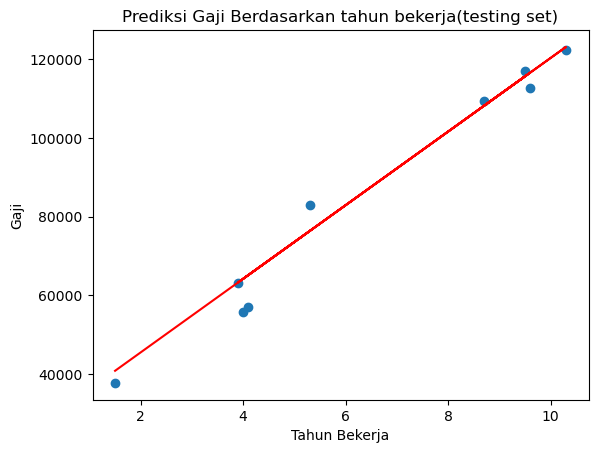

In [25]:
#visualisasi data dari data testing
plt.scatter(X_test, Y_test)
plt.plot(X_test, Y_prediksi, c='r')
plt.xlabel('Tahun Bekerja')
plt.ylabel('Gaji')
plt.title('Prediksi Gaji Berdasarkan tahun bekerja(testing set)')

# Prediction

In [26]:
# mencoba studi kasus, misal kita prediksi gaji seseorang yang telah bekerja selama 2.7, 5.5, 7.5 tahun
print('Gaji Seseorang setelah bekerja selama 2.7 tahun adalah',lin_reg.predict([[2.7]]))
print('Gaji Seseorang setelah bekerja selama 5.5 tahun adalah',lin_reg.predict([[5.5]]))
print('Gaji Seseorang setelah bekerja selama 7.5 tahun adalah',lin_reg.predict([[7.5]]))

Gaji Seseorang setelah bekerja selama 2.7 tahun adalah [52050.09681392]
Gaji Seseorang setelah bekerja selama 5.5 tahun adalah [78258.82841526]
Gaji Seseorang setelah bekerja selama 7.5 tahun adalah [96979.35098765]


## 📦 6. Deployment

Dalam proyek nyata, model ini bisa disimpan dan digunakan dalam aplikasi berbasis web menggunakan `pickle`, `Flask`, atau `Streamlit`.

In [36]:
pip install joblib

In [37]:
import joblib

In [39]:
joblib.dump(lin_reg, 'lin_reg_model.joblib')

['lin_reg_model.joblib']